### Intro

In this section, we are going to look at the concept of derivatives. For this purpose, we import the libraries for different operations and visualization.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Forward Pass

We are going to learn about forward pass and kind of visualize it.

### Define a Function

Let's define a quadratic function :
\begin{equation}
f(x) = 3x^2 - 4x + 5
\end{equation}


In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

Let's calculate the function value for a random value. 3 in this case.


In [3]:
f(3.0)

20.0

Plot the function.

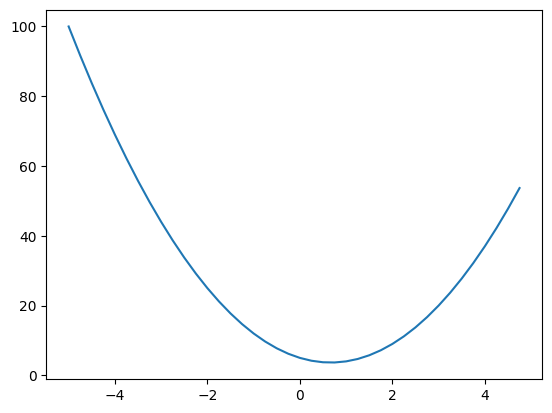

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

Consider h, a very small incremental value. Now, calculate the value of function for both ***f(x)*** and ***f(x+h)***.

In [5]:
h = 0.000001
x = 3.0
print(f"{f(x)}")
print(f"{f(x+h)}")

20.0
20.000014000003002


Calculate the difference.

In [6]:
f(x+h) - f(x)

1.4000003002223593e-05

Calculate the slope.

In [7]:
(f(x+h) - f(x))/h

14.000003002223593

Now, let's look at a bit complex function.

In [8]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [9]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


###  Create the Value Object

We will work with neural networks and in order to do that we need some data structures to manage that. So, To start,<br>
Let's create a ***Value*** object. <br>
Value class takes a single scalar value that it wraps and keep track of.

In [10]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

Python will automatically make use of repr function for displaying value object.

In [11]:
a = Value(2.0)

In [12]:
a

Value(data=2.0)

In [13]:
b = Value(3.0)

In [14]:
b

Value(data=3.0)

Let's Try to add a & b that are basically same datatype.

In [15]:
#a+b

The above expression gives the following error because python doesnot know how to add two value objects.
```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-16-ca730b97bf8a> in <cell line: 1>()
----> 1 a+b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'
```
*Check by removing the comment*

Now, Let's define a function to add two value objects and update the Value class.

In [16]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

```
out = Value(self.data + other.data)
```
This expression helps addition of two datatypes.<br>
Basically, now when we implement `a + b`, following operation happens.
```
a.__add__(b)
```


In [17]:
a = Value(261.0)
b = Value(-343.0)

In [18]:
# Adding

a + b

Value(data=-82.0)

Again, Let's update the value class with a function to multiply two objects.

In [19]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

In [20]:
a = Value(6.0)
b = Value(-3.0)
c = Value(20.0)

In [21]:
a * b + c

Value(data=2.0)

```
out = Value(self.data * other.data)
```
This expression helps addition of two datatypes.<br>
Basically, now when we implement `a * b + c`, following operation happens.
```
(a.__mul__(b)).__add__(c)
```


What we are missing until now is the expression graphs. <br>
So, basically we need to keep pointers about what values produce what other values.<br>
Here, we'll define a new variable named <code>_children </code> and it'll be an empty tuple by default.<br>
And we will introduce a new variable called <code>_prev </code> in the class that is basically set of <code>_children </code>

In [22]:
class Value:

    def __init__(self, data, _children = ()):
        self.data = data
        self._prev = set(_children)

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other))
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other))
        return out

When we start, `_children` will just be an empty set.<br>
But, when an operation is performed, `_children` will be fed in the end.<br>
Just like <br>
`out = Value(self.data + other.data, (self, other))`<br>
`out = Value(self.data * other.data, (self, other))`
<br>
Here, we added two parameter `(self, other)` which is basically the variables that we operated on. <br>
i.e., We are keeping the track of previous values.

In [23]:
a = Value(6.0)
b = Value(-3.0)
c = Value(20.0)
d = a * b + c

In [24]:
d

Value(data=2.0)

In [25]:
d._prev

{Value(data=-18.0), Value(data=20.0)}

So, when we did `d._prev`, we got two values that we operated on.<br><br>
We now know the children Value of the output Value, but we still have not tracked the operation that we did on those Values.<br>
For this problem, Let's update our Value class.<br><br>

We add a new variable `_op` which is an empty string by default.

In [26]:
class Value:

    def __init__(self, data, _children = (), _op = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

When we start, `_op` will just be an empty string.<br>
But, when an operation is performed, `_op` will be fed in the end.<br>
Just like <br>
`out = Value(self.data + other.data, (self, other), '+')`<br>
`out = Value(self.data * other.data, (self, other), '*')`
<br>
Here, we added a string which is basically the operation performed. <br>
i.e., We are keeping the track of operations.

In [27]:
a = Value(16.0)
b = Value(-3.0)
c = Value(80.0)
d = a * b + c

In [28]:
d

Value(data=32.0)

Now, we can not only do `d._prev`, we can also look at what specific operations we performed using `d._op`.

In [29]:
d._prev

{Value(data=-48.0), Value(data=80.0)}

In [30]:
d._op

'+'

Hence, we know that <br>
```
d = Value(data=32.0)
```
is generated using two Values<br>
```
{Value(data=-48.0), Value(data=80.0)}
```
And the operation performed on those Values to generate the output is
```
'+'.
```

Expressions we are using as examples are quiet smaller, but we'd like to work on more complex ones.<br>
It would be better if we created a mechanism to visualize the operations.

In [31]:
from graphviz import Digraph

def trace(root):

    # Set of all nodes and edges in graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges



def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir':'LR'})

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ data %.4f }"%(n.data, ), shape='record')

        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)


    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

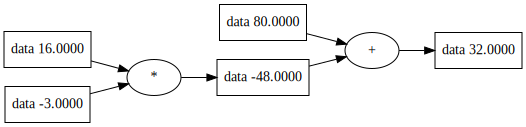

In [32]:
draw_dot(d)

Updating the class Value to add labels:

In [33]:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [34]:
a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'

Updating the visualization function to add labels:

In [35]:
from graphviz import Digraph

def trace(root):

    # Set of all nodes and edges in graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges



def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir':'LR'})

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f }"%(n.label, n.data), shape='record')

        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)


    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

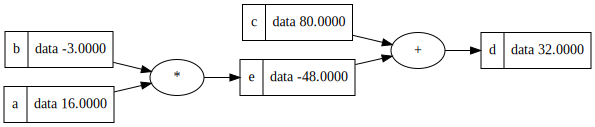

In [36]:
draw_dot(d)

Let's do some even complex operations.

In [37]:
a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data=-640.0)

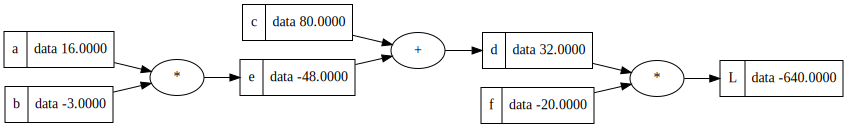

In [38]:
draw_dot(L)

### Backward Pass

Let's learn about back propagation and sort of calculate gradients and store them.<br><br>

Fpr that purpose, we introduce a new variable known as `grad` which is instantiated at 0. Let's update the Value class and visualization function.

In [39]:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [40]:
from graphviz import Digraph

def trace(root):

    # Set of all nodes and edges in graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges



def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir':'LR'})

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }"%(n.label, n.data, n.grad), shape='record')

        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)


    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

Perform some operations to visualize both data and gradients.

In [41]:
a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data=-640.0)

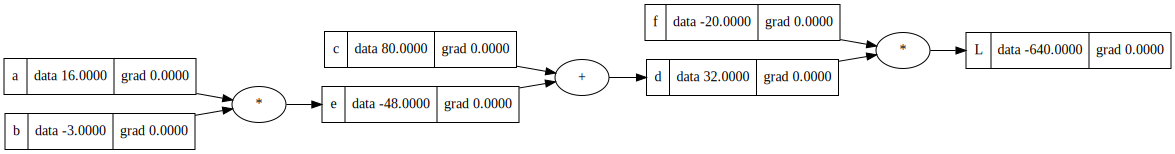

In [42]:
draw_dot(L)

Here, we have all the gradients equal to zero. <br>
This is because we havenot done any backpropagation. So, let's do it.

In [45]:
h = 0.00001

a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L1 = L.data


a = Value(16.0+h, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L2 = L.data

We are taking `L.data` because it's Value Object and we are taking the data from it.

In [46]:
print((L2-L1)/h)

59.99999998493876


Let's try something similar.

In [47]:
h = 0.00001

a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L1 = L.data


a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L2 = L.data + h

In [48]:
print((L2-L1)/h)

0.9999999974752426
